In [1]:
#1. Train a neural network using **ALL** the records in this dataset to perform a two-class classification analysis.
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

import numpy as np
np.random.seed(100)

#import dataset
import pandas as pd
dataset = pd.read_csv('CellDNA.csv',header=None)

#Split X & y
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,13].values

#Standardize X
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X = scaler.fit_transform(X)

#binarize y
from sklearn.preprocessing import binarize
y_bin = np.ravel(binarize(y.reshape(1,-1), 0))

#categorize y
y_cat = utils.to_categorical(y_bin, 2)


#create model, connect layers with Functional API
visible = Input(shape=(13,)) 
hidden1 = Dense(10, activation='relu', name= 'h1')(visible)
hidden2 = Dense(6, activation='relu', name= 'h2')(hidden1)
output = Dense(2, activation='softmax', name= 'O')(hidden2)
model = Model(inputs = visible, outputs = output) #2 classes

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize layers
model.summary()

# Fit the model
model.fit(X, y_cat, epochs=150, batch_size=10,verbose=0)

#predict
y_pred = model.predict(X)
y_pred_class = np.argmax(y_pred, axis = 1)


# evaluate the model
scores = model.evaluate(X, y_cat)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred_class)
print('\n Confusion Matrix \n',cm)

P:\Users\Jess\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
h1 (Dense)                   (None, 10)                140       
_________________________________________________________________
h2 (Dense)                   (None, 6)                 66        
_________________________________________________________________
O (Dense)                    (None, 2)                 14        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
1217/1217 [==============================] - 0s 78us/sample - loss: 0.1074 - accuracy: 0.9540

accuracy: 95.40%

 Confusion Matrix 
 [[995  22   0   0   0   0   0   0   0   0   0]
 [  1  19   0   0   0   0   0   0   0   0   0]
 [  1  19   0   0   0   0   0   0 

In [2]:
#2. Extract the hidden representations (Z-Code) of all the input records from the last layer 
#(the layer right before the Softmax layer) of the trained neural network.

# copy from existing model
new_model = Model(inputs=model.input,outputs=model.get_layer('h2').output)
z_code = new_model.predict(X)
print(z_code.shape)


(1217, 6)


In [3]:
#3. If the dimension of the Z-Code is greater than two dimensions, perform a t-sne compression to reduce the dimension to 2.
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 0)

tsne_z= tsne.fit_transform(z_code)
print(tsne_z.shape)

(1217, 2)


In [4]:
#4. Use t-sne compression results to reduce the dimensionality of the raw data from 13 to 2
tsne_x= tsne.fit_transform(X)
print(tsne_x.shape)


(1217, 2)


P:\Users\Jess\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
P:\Users\Jess\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'tsne z')]

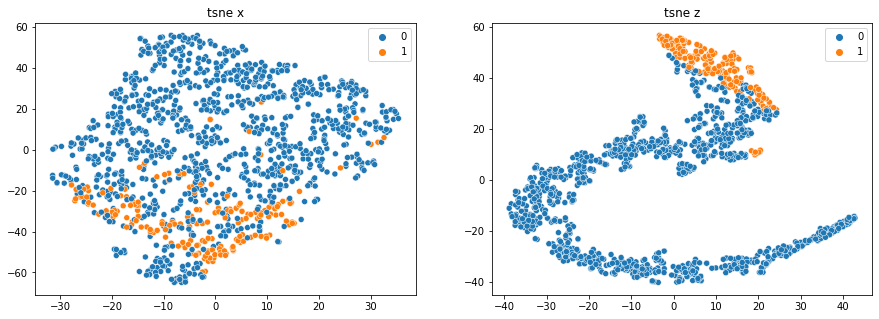

In [5]:
#5. Create two group plots: the one on the left contains points you obtained in step 4,
#and the one on the right contains points you obtained in step 3. Please make sure
#that you use two colors to represent the classes of the data points in each plot.
#Please see our slides for the example plots.

import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(1,2,figsize = (15,5))
color = sns.color_palette(None,2)
sns.scatterplot(tsne_x[:,0],tsne_x[:,1], palette=color, hue = y_pred_class, ax=axes[0]).set(title="tsne x")
sns.scatterplot(tsne_z[:,0],tsne_z[:,1], palette=color, hue = y_pred_class, ax=axes[1]).set(title="tsne z")

